In [93]:
import pandas as pd 

df = pd.read_csv("data.csv").T
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df.head(8)



User,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,06/08/2020 07:39,06/08/2020 12:18,06/08/2020 12:31,06/08/2020 14:23,06/08/2020 21:14,06/08/2020 21:14,07/08/2020 08:04,07/08/2020 08:29,08/08/2020 06:51,08/08/2020 18:56,09/08/2020 08:20,09/08/2020 11:05,17/08/2020 07:48
1,06/08/2020 07:39,06/08/2020 12:18,06/08/2020 12:31,06/08/2020 14:23,06/08/2020 21:14,06/08/2020 21:15,07/08/2020 08:04,07/08/2020 11:59,08/08/2020 06:51,08/08/2020 18:56,09/08/2020 08:20,09/08/2020 11:06,17/08/2020 07:48
2,06/08/2020 07:39,06/08/2020 12:18,06/08/2020 12:31,06/08/2020 14:24,06/08/2020 21:14,06/08/2020 21:15,07/08/2020 08:04,07/08/2020 11:59,08/08/2020 06:51,08/08/2020 18:56,09/08/2020 08:20,09/08/2020 11:07,17/08/2020 07:49
3,06/08/2020 07:39,06/08/2020 12:18,06/08/2020 12:32,06/08/2020 14:24,06/08/2020 21:15,06/08/2020 21:15,07/08/2020 08:05,07/08/2020 11:59,08/08/2020 06:51,08/08/2020 18:56,09/08/2020 08:21,09/08/2020 11:07,17/08/2020 07:49
4,06/08/2020 07:39,06/08/2020 12:18,06/08/2020 12:32,06/08/2020 14:24,06/08/2020 21:15,06/08/2020 21:15,07/08/2020 08:05,07/08/2020 11:59,08/08/2020 06:51,08/08/2020 18:56,09/08/2020 08:21,09/08/2020 11:09,17/08/2020 07:49
5,06/08/2020 07:39,06/08/2020 12:19,06/08/2020 12:32,06/08/2020 14:24,06/08/2020 21:15,06/08/2020 21:15,07/08/2020 08:05,11/08/2020 08:38,08/08/2020 06:51,08/08/2020 18:56,09/08/2020 08:21,09/08/2020 11:09,17/08/2020 07:49
6,06/08/2020 07:39,06/08/2020 12:19,06/08/2020 12:32,06/08/2020 14:25,06/08/2020 21:16,06/08/2020 21:16,07/08/2020 08:05,11/08/2020 08:38,08/08/2020 06:52,08/08/2020 18:57,09/08/2020 08:21,09/08/2020 11:10,17/08/2020 07:49
7,06/08/2020 07:39,06/08/2020 12:19,06/08/2020 12:32,06/08/2020 14:25,06/08/2020 21:16,06/08/2020 21:16,07/08/2020 08:05,11/08/2020 16:50,08/08/2020 06:52,08/08/2020 18:57,09/08/2020 08:21,09/08/2020 11:10,17/08/2020 07:49


In [94]:
dfbyUserDate = pd.DataFrame()
dfbyUserTime = pd.DataFrame()
for user in df.columns:
    dfbyUserDate[user] = pd.to_datetime(df[user],format ="%d/%m/%Y %H:%M").dt.strftime("%Y-%m-%d")
    dfbyUserTime[user] = pd.to_datetime(df[user],format ="%d/%m/%Y %H:%M").dt.strftime("%H.%M")  

In [95]:
df_good = pd.DataFrame(columns=['id','date','time'])

offs=0
for us in df.columns:
    l1=pd.to_datetime(dfbyUserDate[us].dropna())
    l2=pd.to_numeric(dfbyUserTime[us].dropna())

    for indx in range(0,len(l1)):
        df_good.loc[indx+offs]=[us,l1[indx],l2[indx]]

    offs=offs+len(l1)


In [172]:
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

end = datetime.date(2020,8,6) 
start = datetime.date(2020,8,17) 
one_day = datetime.timedelta(days = 1)  

date_list = [datetime.date(2020,8,6), datetime.date(2020,8,7), 
datetime.date(2020,8,8), datetime.date(2020,8,9), datetime.date(2020,8,10), 
datetime.date(2020,8,11), datetime.date(2020,8,12), 
datetime.date(2020,8,13), datetime.date(2020,8,14), datetime.date(2020,8,15),datetime.date(2020,8,16),datetime.date(2020,8,17)]

week = [] 
for i in range((end-start).days+1):  
    week.append(start + (i)*one_day)

numweek = date2num(week)


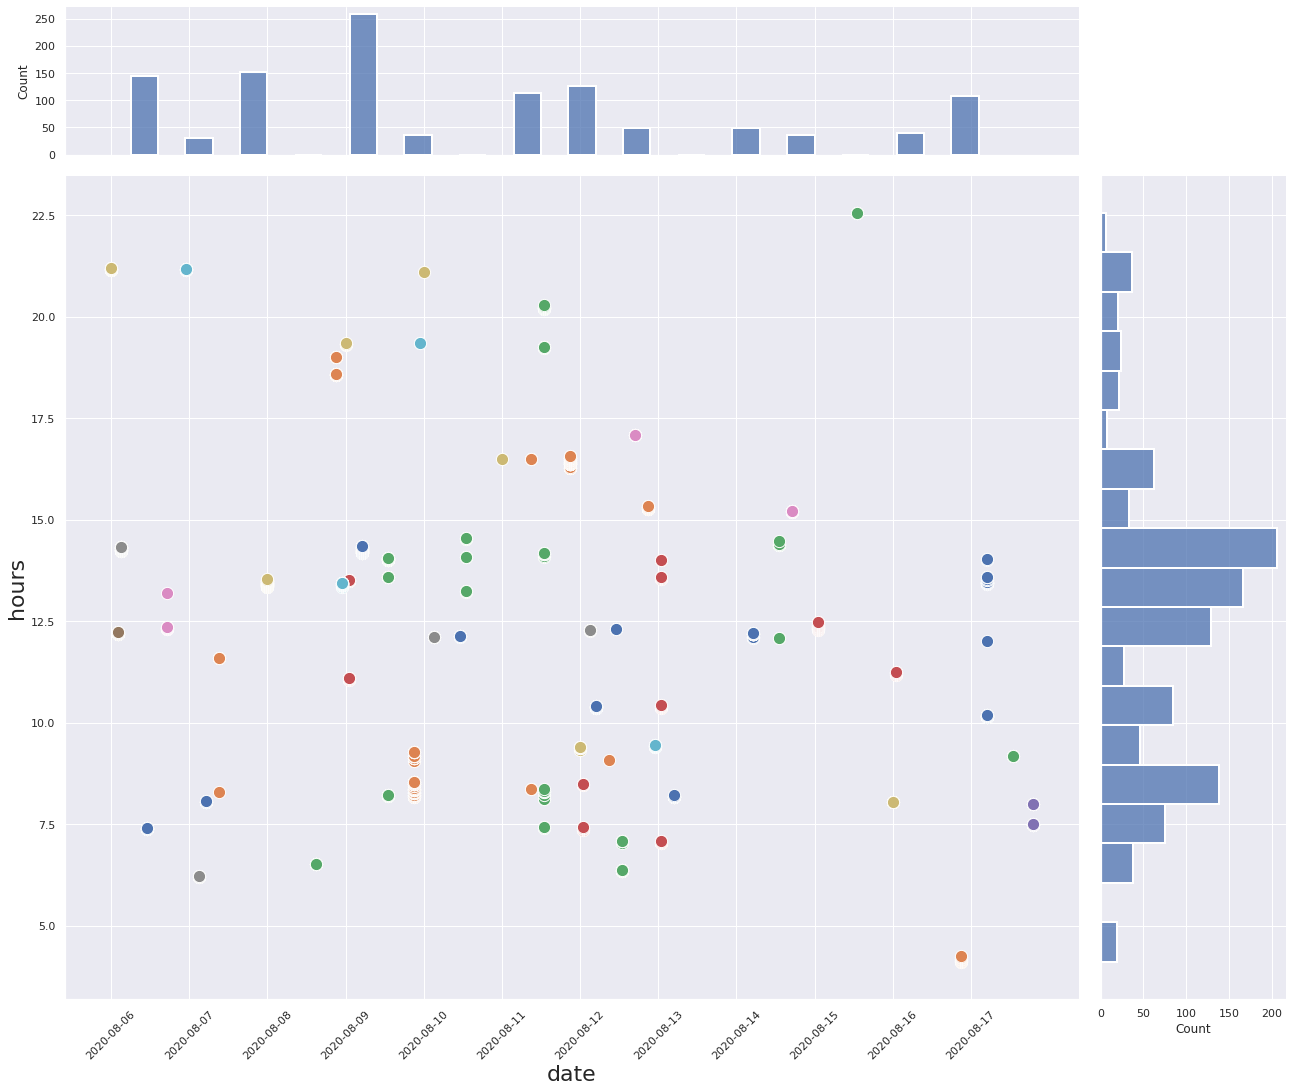

In [191]:
import seaborn as sns
import matplotlib.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
sns.set()

groups=df_good.groupby("id")
g=sns.JointGrid(size=14,height=5, marginal_ticks=True)


for tick in g.ax_joint.get_xticklabels():         
    tick.set_rotation(45)
  


shift=0
h=[11,21,13,1,19,2,17,3,0,23,5,9,15,7]
for name, group in groups:
    
    for idx in range(len(group["date"])):
        group['date'].iloc[idx]=group['date'].iloc[idx].replace(hour=h[shift], minute=0, second=0)
    
    shift=shift+1
    sns.scatterplot(group["date"], group["time"],s=150,ax=g.ax_joint)

sns.histplot(y=df_good["time"], linewidth=2, ax=g.ax_marg_y)
sns.histplot(x=df_good["date"],linewidth=2, bins = numweek,ax=g.ax_marg_x,shrink=0.5,binwidth=.7)
g.set_axis_labels('date', 'hours', fontsize=22)
g.ax_joint.set_xticks(df_good["date"].unique())



plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(18.5, 15.5)

fig.savefig('test2png.pdf', dpi=100)




In [97]:
cc=df_good["date"].value_counts().rename_axis('unique_values').reset_index(name='counts')
cc.sort_values(by=['unique_values'],inplace=True)
cc['unique_values']


2    2020-08-06
11   2020-08-07
1    2020-08-08
0    2020-08-09
9    2020-08-10
4    2020-08-11
3    2020-08-12
7    2020-08-13
6    2020-08-14
10   2020-08-15
8    2020-08-16
5    2020-08-17
Name: unique_values, dtype: datetime64[ns]

In [98]:
#sns.histplot(x=df_good["date"],bins=12,linewidth=2, ax=g.ax_marg_x)
sns.histplot(y=df_good["time"], linewidth=2, ax=g.ax_marg_y)

df_test=pd.DataFrame()
df_test["date"] = df_good["date"].astype("datetime64")

df_test.groupby([df_test["date"].dt.year,df_test["date"].dt.month,df_test["date"].dt.day]).count().plot(kind="bar",ax=g.ax_marg_x)



<AxesSubplot:xlabel='date,date,date', ylabel='Count'>

Text(0.5, 0, 'Date')

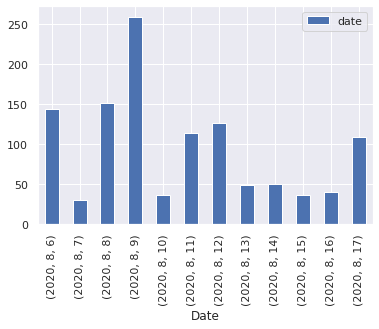

In [99]:
fig, ax = plt.subplots()
df_test=pd.DataFrame()
df_test["date"] = df_good["date"].astype("datetime64")

df_test.groupby([df_test["date"].dt.year,df_test["date"].dt.month,df_test["date"].dt.day]).count().plot(kind="bar",ax=ax)
ax.set_xlabel("Date")

